scipy计算出来的值 21.17270579104895
在生成1000个随机数时，其面积大概为:19.94911335029519
在生成2000个随机数时，其面积大概为:19.51714436042659
在生成5000个随机数时，其面积大概为:20.561723917745198
在生成8000个随机数时，其面积大概为:21.06830573313655
在生成10000个随机数时，其面积大概为:21.072232723953537


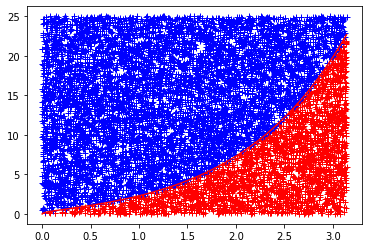

In [12]:
#16.1

import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy import integrate
def f(x):
    return np.exp(x)*np.sin(np.sqrt(x))
v,err=integrate.quad(f,0,np.pi)#integrate.quad()求一重积分，err是误差
print('scipy计算出来的值',v)
pi=np.pi      #将pi进行定义
x=np.arange(0,pi,0.0001)
y=np.exp(x)*np.sin(np.sqrt(x))       #计算出那条函数的值
for i in [1000,2000,5000,8000,10000]:
    x1=rand.uniform(0,pi,i)
    y1=rand.uniform(0,25,i)          #生成1000个平均分布的随机数
    inside=(np.exp(x1)*np.sin(np.sqrt(x1))-y1) > 0      #将所给的点进行分类，选出符合条件的点
    outside=np.invert(inside)        #将不属于上面条件的点也给选出来
    s=pi*25*inside.sum()/i           #根据符合条件的点数与总点数的关系计算面积
    print("在生成{}个随机数时，其面积大概为:{}".format(i,s))         #将面积打印出来
#画出最后10000个随机点数的分布示意图
plt.plot(x1[inside],y1[inside],'r+')
plt.plot(x1[outside],y1[outside],'b+')
plt.plot(x,y,'r')
plt.show()

scipy计算出来的值 0.1997356031514789
第一部分面积的值 0.17416516976366667
第二部分面积的值 0.022811501446722032
积分经过蒙特卡洛估计为： 0.1969766712103887


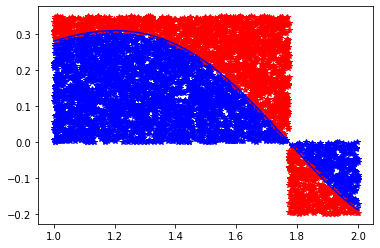

In [41]:
#16.2

'''
#由于这个函数的数值有正有负，故将该函数分成两部分，一是大于0时的，另一个是小于0时的
'''
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
def f(x):
    return np.sin(x**2)/(x+2)
v1,err1 = integrate.quad(f,1,np.sqrt(np.pi))#integrate.quad()求一重积分，err是误差
v2,err1 = integrate.quad(f,np.sqrt(np.pi),2)#integrate.quad()求一重积分，err是误差
print('scipy计算出来的值',v1-v2)#生成需积分函数的值点
x=np.arange(1,2,0.001)
y=np.sin(x**2)/(x+2)

#蒙特卡洛方法计算函数值大于0时的面积
x1=rand.uniform(1,np.sqrt(np.pi),5000)
y1=rand.uniform(0,0.35,5000)
inside=((np.sin(x1**2)/(x1+2))-y1)>=0
outside=np.invert(inside)
s1=(np.sqrt(np.pi)-1)*0.35*inside.sum()/5000
print('第一部分面积的值',s1)
plt.plot(x1[inside],y1[inside],'b*')
plt.plot(x1[outside],y1[outside],'r*')
#蒙特卡洛方法计算小于0时的面积
x2=rand.uniform(np.sqrt(np.pi),2,800)
y2=rand.uniform(-0.2,0,800)
inside1=((np.sin(x2**2)/(x2+2))-y2) < 0
outside1=np.invert(inside1)
s2=(2-np.sqrt(np.pi))*0.2*inside1.sum()/800
print('第二部分面积的值',s2)
plt.plot(x2[inside1],y2[inside1],'b*')
plt.plot(x2[outside1],y2[outside1],'r*')
plt.plot(x,y,'b')
s=s1+s2     #计算函数积分值
print("积分经过蒙特卡洛估计为：",s)
plt.show()

0.039
0.03
该函数的二重积分为： 0.069


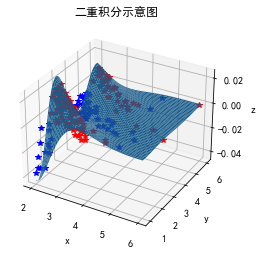

In [51]:
#16.3

import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.rc('font',family='SimHei')
plt.rc('axes',unicode_minus=False)
#生成一些均匀分布的点，用来画函数图
x=np.linspace(2,6,1000)
y=np.linspace(1,6,1000)
X,Y=np.meshgrid(x,y)      #生成x,y的的格点矩阵
Z=np.exp(-X-np.sqrt(Y))*np.sin(6*np.sqrt(X)+2*Y)
#生成随机数，并进行分类，找出符合条件的点
#当函数值大于零时
x1=rand.uniform(2,6,2000)
y1=rand.uniform(1,6,2000)
z1=rand.uniform(0,0.03,2000)
inside=(np.exp(-x1-np.sqrt(y1))*np.sin(6*np.sqrt(x1)+2*y1)-z1)>=0
s1=4*5*0.03*inside.sum()/2000       #计算该条件小符合条件下的体积
print(s1)
#当函数值小于零时
z2=rand.uniform(-0.05,0,2000)
inside1=(np.exp(-x1-np.sqrt(y1))*np.sin(6*np.sqrt(x1)+2*y1)-z2)<=0
s2=4*5*0.05*inside1.sum()/2000      #计算符合该条件的体积
print(s2)
#画图
ax=plt.axes(projection='3d')        #为画3d图像的讲解
ax.plot3D(x1[inside1],y1[inside1],z2[inside1],'b*')
ax.plot3D(x1[inside],y1[inside],z1[inside],'r*')
ax.plot_surface(X,Y,Z)
ax.set_xlabel('x');ax.set_ylabel('y');ax.set_zlabel('z')
ax.set_title('二重积分示意图')
s=s1+s2      #计算该函数的二重积分
print("该函数的二重积分为：",s)
plt.show()

粗略计算的椭球面的体积为： 181.8


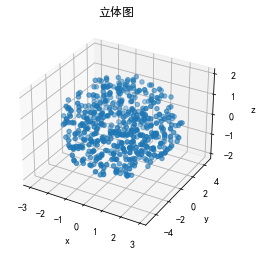

In [52]:
#16.4

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits as mplot3d
import numpy.random as rand
#生成x,y,z方向上对应大小的随机数1000个
x=rand.uniform(-3,3,1000)
y=rand.uniform(-5,5,1000)
z=rand.uniform(-2,2,1000)
#筛选出符合条件的点，并计算体积
inside=(x**2/9+y**2/25+z**2/4)<=1
s=inside.sum()/1000*9*10*4
#筛选出不符合条件的点
outside=np.invert(inside)
print("粗略计算的椭球面的体积为：",s)
#开始画图
plt.rc('font',family='SimHei')
plt.rc('axes',unicode_minus=False)
ax=plt.axes(projection='3d')
ax.scatter(x[inside],y[inside],z[inside],'r')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("立体图")
plt.show()

B方案优于A方案


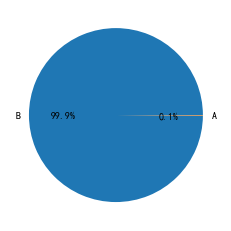

In [53]:
#16.5

import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand
k1=0
k2=0
for j in range(1,1000,1):#进行1000次实现
    f = 200 #初始量，前两天平均销售量当做当天的存货量
    z = 200 #初始量，前一天的销售量当做今天的进货量
    s1=0
    s2=0
    for i in range(1, 100, 1):
        x = rand.normal(200, 20 ** 2, 1)#当天市场的需求量
        if x >= f:
            s1 = s1 + 2.5 * f
        else:
            s1 = s1 + 5 * x - 2.5 * f
        if x >= z:
            s2 = s2 + 2.5 * z
        else:
            s2 = s2 + 5 * x - 2.5 * z
        f = (x + z) / 2
        z = x
    if s1 > s2:
        k1 = k1 + 1
    else:
        k2 = k2+1
q=np.array([k1,k2])
labels='B','A'
explode=(0.2,0)
if k1>k2:print("B方案优于A方案")
else:print("A方案优于B方案")
plt.pie(q,labels=labels,autopct='%1.1f%%')
plt.show()

应该购买一台A型机


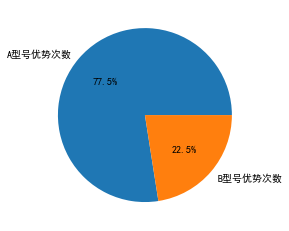

In [55]:
#16.6

import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
#数据初始化
A=0;B=0
#进行蒙特卡洛模拟，进行循环。这里我们将每个人的工作量定义为10
#将机器的工作效率函数定义为正态分布函数
#将同时来到的人数定义为均匀分布的随机数
for k in range(1,1000):
    n=rand.randint(1,6,1);
    t1=0;t2=0;t3=0
    j=n;i=n
    while i>0:
        w1=rand.normal(2,2/3,1)
        t1=10/w1+t1
        i=i-1
    while j>0:
        w2=rand.normal(1,1/3,1)
        w3=rand.normal(1,1/3,1)
        if t2==t3:
            if j>=2:
                t2=t2+10/w2
                t3=t3+10/w3
                j=j-2
            else:
                t2=t2+10/w2
                j=j-1
        if t2<t3:
            t2=t2+10/w2
            j=j-1
        if t3<t2:
            t3=t3+10/w3
            j=j-1
    if t2>=t3:t4=t2
    else:t4=t3
    if t1<=t4:A=A+1
    else:B=B+1
if A>B:print('应该购买一台A型机')
else:print('应该购买两台B型机')
#将所计算出的A，B的优势次数用图像来表示
plt.rc('font',family='SimHei')
labels='A型号优势次数','B型号优势次数'
sizes=[A,B]
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.show()

In [54]:
#16.7

import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand
#设立函数，使后面可以生成不同概率的随机数
def fff(x):
    if x>98:
        return 5
    elif x>93:
        return 4
    elif x>83:
        return 3
    elif x>53:
        return 2
    elif x>23:
        return 1
    else:
        return 0
q=0
#设立每一次所需要下车数的函数，持续1000天
def kkk():
    c = 0;d = 0
    for i in range(1, 1000, 1):
        a = rand.randint(1, 101, 1)
        b = fff(a)
        c = c + b
        if c >= 2:
            c = c - 2
            d = d + c
        else:
            c = 0
    v = d / 1000
    return v
#进行100次不同的随机测试，计算平均值
for j in range(1,100,1):
    q=q+kkk()
print("每天推迟的平均车数：",q/100)

每天推迟的平均车数： 0.8633700000000001
